In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500,centers = 5 , random_state = 3)

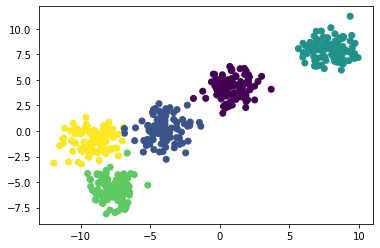

In [3]:
fig = plt.plot()
plt.grid = True
plt.scatter(X[:,0],X[:,1], c= y)
plt.show()

In [4]:
k = 5

colors = ['green','yellow','blue','cyan','red']

clusters = {}

for idx in range(k):
    center = 10*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : [],
        'color'  : colors[idx]
    }
    
    clusters[idx] = cluster 

In [5]:
clusters

{0: {'center': array([-5.55821616,  1.64332265]),
  'points': [],
  'color': 'green'},
 1: {'center': array([ 3.27460858, -0.86080809]),
  'points': [],
  'color': 'yellow'},
 2: {'center': array([-2.54929354,  0.53541339]),
  'points': [],
  'color': 'blue'},
 3: {'center': array([-1.85892325,  1.49928557]),
  'points': [],
  'color': 'cyan'},
 4: {'center': array([-1.92482882e-03,  2.83872679e+00]),
  'points': [],
  'color': 'red'}}

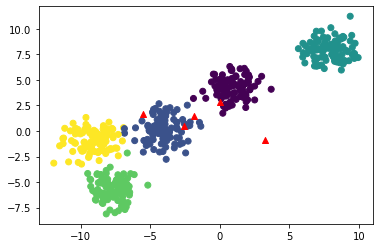

In [6]:
plt.scatter(X[:,0],X[:,1], c= y)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = "^", c= 'red')
plt.show()

In [7]:
def distance(v1,v2):
    return np.sqrt(sum((v1-v2)**2))

In [8]:
v1 = np.array([1,2])
v2 = np.array([3,4])
distance(v1,v2)

2.8284271247461903

In [42]:
# Implementing The E step

def assign_clusters() :
    for idx in range(X.shape[0]):
        dist = []
        
        curr_x = X[idx]
        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)

# Implementing M step
def update_clusters():
    for idx in range(k):
        pts = np.array(clusters[idx]['points'])
        if pts.shape[0]>0:
            new_centers = pts.mean(axis=0)
            clusters[idx]['center'] = new_centers
            clusters[idx]['points'] = []
            
            
        
def plot_clusters():
    for i in clusters:
        pts = np.array(clusters[i]['points'])
        try :
            plt.scatter(pts[:,0],pts[:,1],c=clusters[i]['color'])
        except:
            pass
        center = clusters[i]['center']
        plt.scatter(center[0],center[1],c='black', marker = "^")        
        


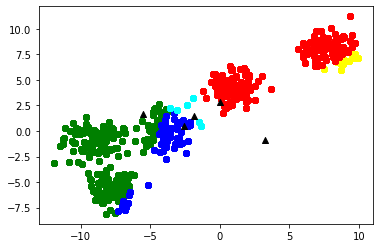

In [40]:
assign_clusters()
plot_clusters()
update_clusters()

In [15]:
clusters


{0: {'center': array([-5.55821616,  1.64332265]),
  'points': [array([-8.91918262, -6.772189  ]),
   array([-7.37151112, -5.0506429 ]),
   array([-4.65743008,  0.05077508]),
   array([-9.85614721, -1.94829844]),
   array([-6.74761638, -5.40793452]),
   array([-4.65780461,  0.51339663]),
   array([-9.14747586, -5.83583269]),
   array([-6.67147607, -5.89031942]),
   array([-7.33837507, -5.9643993 ]),
   array([-7.82304106, -6.34230341]),
   array([-6.60607411, -5.67971605]),
   array([-10.3969262 ,  -0.28827972]),
   array([-9.18719238, -0.47349654]),
   array([-4.45650534,  0.65156136]),
   array([-8.11324217, -0.41686247]),
   array([-8.3795168 , -6.85309235]),
   array([-10.22494442,   0.16581105]),
   array([-8.78389426, -5.7223743 ]),
   array([-7.19122107, -6.06289094]),
   array([-9.71656698, -1.47258778]),
   array([-8.94815361, -0.83618661]),
   array([-6.85842659, -0.2135485 ]),
   array([-9.35219832, -2.15663244]),
   array([-9.22724642, -1.50874141]),
   array([-7.90896662, -

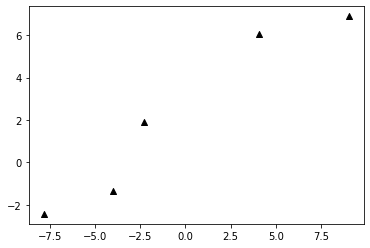